# Danh sách thành viên:
#### Võ Quốc Thái - 52000398
#### Nguyễn Tấn Phát - 52000583
#### Trương Thị Bích Trinh - 52000424

## 1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filename)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Kiểm tra tên của các cột
names = list(df.columns)
print(names)
# Kiểm tra loại của các cột
types = df.dtypes
print(types)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Kết hợp tất cả dữ liệu với nhau theo một định dạng thống nhất
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])

In [6]:
data = df.drop(['customerID'], axis=1)

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [8]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
print(X.shape)
print(y.shape)

(7043, 19)
(7043,)


In [9]:
# Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

In [11]:
print(X_scaler[0])
print(data.head())

[0.         0.         1.         0.         0.01388889 0.
 0.5        0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.66666667 0.11542289
 0.38361409]
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1       

In [12]:
print("Kích thước của df trước khi loại bỏ giá trị ngoại lai:", df.shape)
#Loại bỏ các giá trị ngoại lai
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
X_scaled_data = pd.DataFrame(X_scaled, columns = X.columns)

print("Kích thước của df sau khi loại bỏ giá trị ngoại lai:", data_no_outliers.shape)

Kích thước của df trước khi loại bỏ giá trị ngoại lai: (7043, 21)
Kích thước của df sau khi loại bỏ giá trị ngoại lai: (5323, 20)


In [13]:
#Kiểm tra dữ liệu đã được chuẩn hóa chính xác
print("Means dữ liệu sau khi được chuẩn hóa : ",X_test.mean(axis=0))
print("\nStds dữ liệu sau khi được chuẩn hóa : ",X_test.std(axis=0))

Means dữ liệu sau khi được chuẩn hóa :  gender                 0.477993
SeniorCitizen          0.166588
Partner                0.477993
Dependents             0.292948
tenure                32.223852
PhoneService           0.898249
MultipleLines          0.911027
InternetService        0.868434
OnlineSecurity         0.785140
OnlineBackup           0.890204
DeviceProtection       0.921439
TechSupport            0.795551
StreamingTV            0.970658
StreamingMovies        0.976337
Contract               0.680076
PaperlessBilling       0.607667
PaymentMethod          1.586370
MonthlyCharges        64.683696
TotalCharges        3218.951727
dtype: float64

Stds dữ liệu sau khi được chuẩn hóa :  gender                 0.499634
SeniorCitizen          0.372696
Partner                0.499634
Dependents             0.455223
tenure                24.751426
PhoneService           0.302392
MultipleLines          0.943798
InternetService        0.734507
OnlineSecurity         0.861215
OnlineBac

In [14]:
#Điền giá trị trung bình cho các cột bị thiếu
data.fillna(data.mean(), inplace=True)

In [15]:
#Xóa các feature có phương sai thấp
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)
print(X_train)
print(X_test)

[[1.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 7.070e+01 3.236e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 2.000e+00 8.055e+01 6.021e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.930e+01 2.241e+03]
 ...
 [1.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 2.115e+01 2.659e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.000e+00 9.945e+01 3.700e+02]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.980e+01 3.890e+03]]
[[0.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 2.480e+01 2.044e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 2.525e+01 6.522e+03]
 [0.000e+00 0.000e+00 1.000e+00 ... 3.000e+00 1.935e+01 6.700e+01]
 ...
 [1.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 6.050e+01 3.187e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 9.070e+01 1.312e+03]
 [1.000e+00 0.000e+00 1.000e+00 ... 2.000e+00 5.110e+01 4.240e+02]]



Số lượng của các điểm dữ liệu : 5323


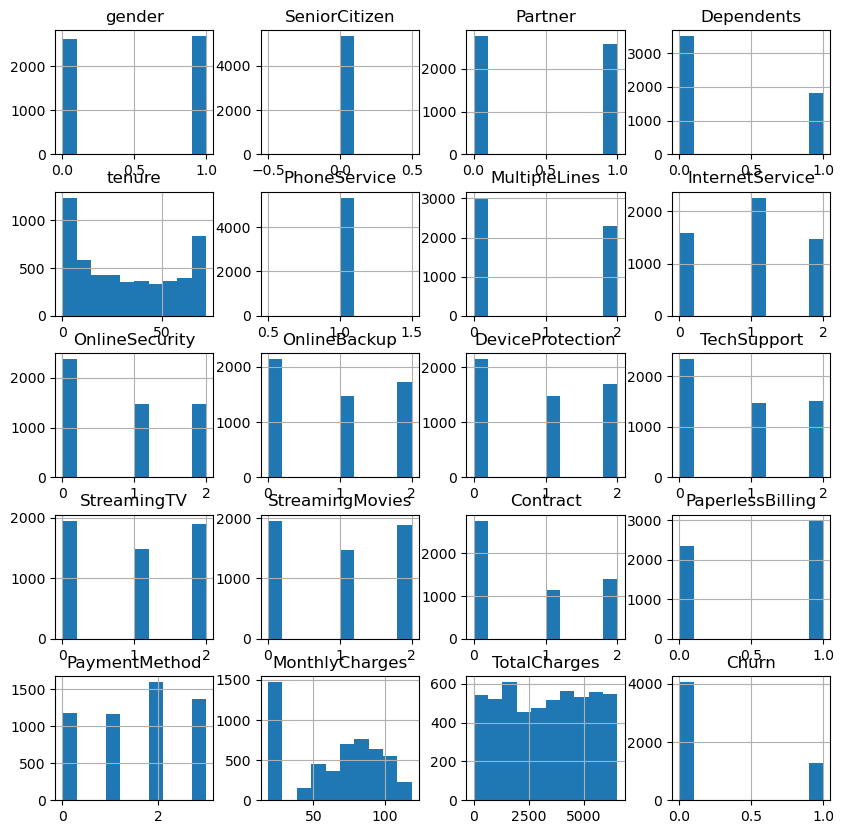

In [16]:
#Kiểm tra số lượng dữ liệu
print("\nSố lượng của các điểm dữ liệu :", len(data))
#Kiểm tra phân phối của các cột đặc trưng
import matplotlib.pyplot as plt
data.hist(figsize=(10,10))
plt.show()

## 2) Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing kết hợp với áp dụng các kỹ thuật tránh Overfiting

### Cross-validation để chọn giá trị k tốt nhất để tránh overfitting cho KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Sử dụng GridSearchCV để tìm giá trị k tốt nhất
param_grid = {'n_neighbors': range(1, 21)}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# In giá trị k tốt nhất
print("Best k:", grid_search.best_params_['n_neighbors'])

Best k: 14


In [29]:
from sklearn.ensemble import BaggingClassifier
# Khởi tạo mô hình
knn_1 = KNeighborsClassifier(n_neighbors = 14)
# Sử dụng Bagging với kNN
knn = BaggingClassifier(estimator=knn_1, n_estimators=10, random_state=42)

### Sử dụng regularization L2 để giảm trọng số để tránh overfitting cho Linear Regression

In [30]:
from sklearn.linear_model import Ridge
alpha = 1.0

# Khởi tạo mô hình
lr = Ridge(alpha=alpha)

### Sử dụng phương pháp giới hạn Độ Sâu (Max Depth) để tránh overfitting cho Decission Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo các mô hình
dtc = DecisionTreeClassifier(max_depth=5)
dtr = DecisionTreeRegressor(max_depth=5)

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
nb_models = [MultinomialNB(), GaussianNB()]

### Sử dụng phương pháp giới hạn Độ Sâu (Max Depth) và kiểm soát Learning Rate để tránh overfitting cho các mô hình Ensemble Learning¶

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Khởi tạo các mô hình
ada_c = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.5)
ada_r = AdaBoostRegressor()
gradient_c = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.5, max_depth = 5)
gradient_r = GradientBoostingRegressor()
xgbo_c = xgb.XGBClassifier(n_estimators = 50, learning_rate = 0.5, max_depth = 5)
xgbo_r =xgb.XGBRegressor()


*** AdaBoostClassifier (Classification) ***
Accuracy score: 0.8008
Confusion matrix:
[[1389  150]
 [ 271  303]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



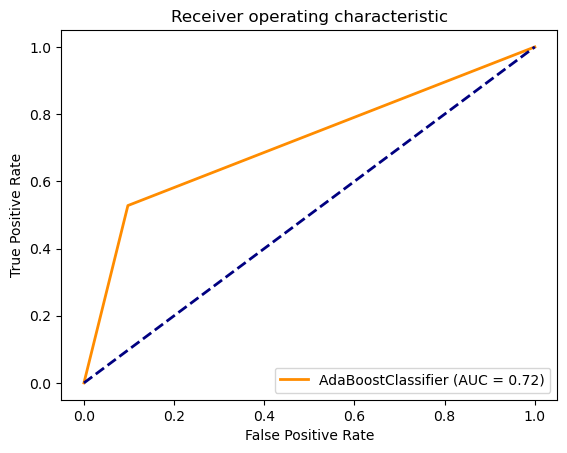


*** GradientBoostingClassifier (Classification) ***
Accuracy score: 0.7870
Confusion matrix:
[[1374  165]
 [ 285  289]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.50      0.56       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



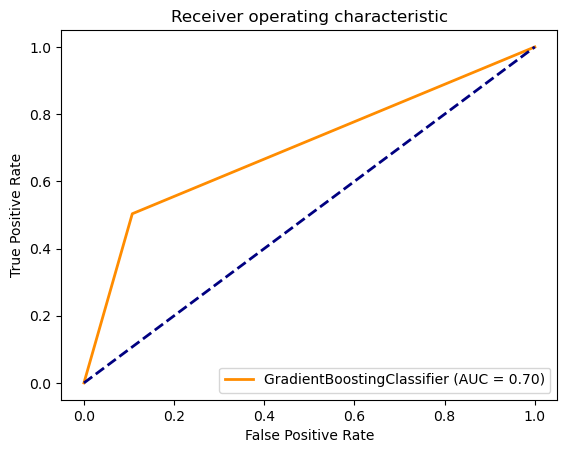


*** XGBClassifier (Classification) ***
Accuracy score: 0.7709
Confusion matrix:
[[1351  188]
 [ 296  278]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.60      0.48      0.53       574

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



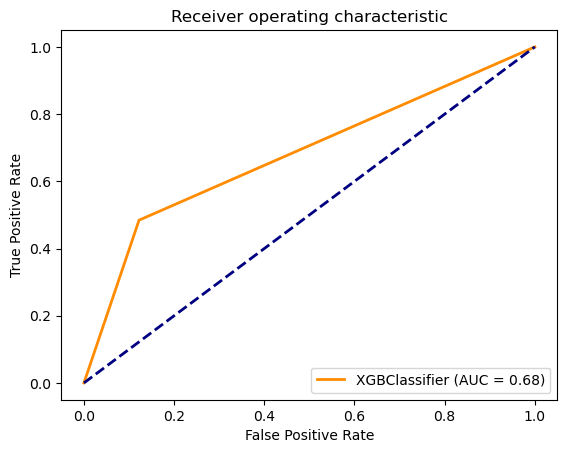


*** AdaBoostRegressor (Regression) ***
R2 score: 0.2701
Mean squared error: 0.1444
Mean absolute error: 0.3127
Root Mean squared error: 0.3800

*** GradientBoostingRegressor (Regression) ***
R2 score: 0.3344
Mean squared error: 0.1317
Mean absolute error: 0.2698
Root Mean squared error: 0.3629

*** XGBRegressor (Regression) ***
R2 score: 0.2063
Mean squared error: 0.1570
Mean absolute error: 0.2822
Root Mean squared error: 0.3963

*** BaggingClassifier (Classification) ***
Accuracy score: 0.7634
Confusion matrix:
[[1430  109]
 [ 391  183]]
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1539
           1       0.63      0.32      0.42       574

    accuracy                           0.76      2113
   macro avg       0.71      0.62      0.64      2113
weighted avg       0.74      0.76      0.73      2113



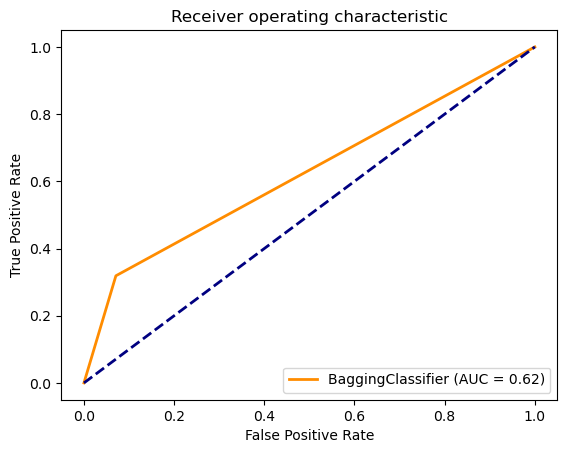


*** Ridge (Regression) ***
R2 score: 0.2897
Mean squared error: 0.1405
Mean absolute error: 0.3108
Root Mean squared error: 0.3749

*** DecisionTreeClassifier (Classification) ***
Accuracy score: 0.7856
Confusion matrix:
[[1411  128]
 [ 325  249]]
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.43      0.52       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



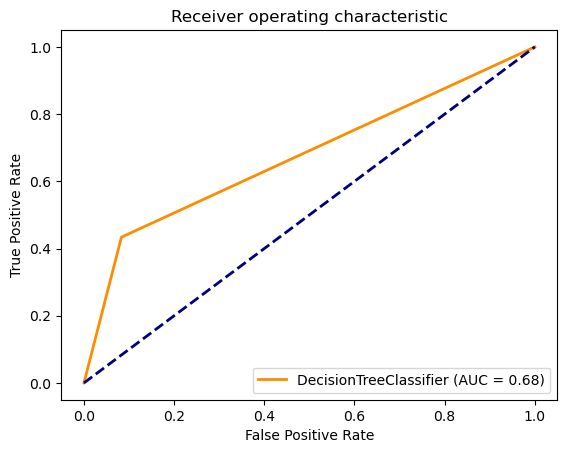


*** DecisionTreeRegressor (Regression) ***
R2 score: 0.2926
Mean squared error: 0.1400
Mean absolute error: 0.2774
Root Mean squared error: 0.3741

*** MultinomialNB (Classification) ***
Accuracy score: 0.7425
Confusion matrix:
[[1157  382]
 [ 162  412]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1539
           1       0.52      0.72      0.60       574

    accuracy                           0.74      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.74      0.75      2113



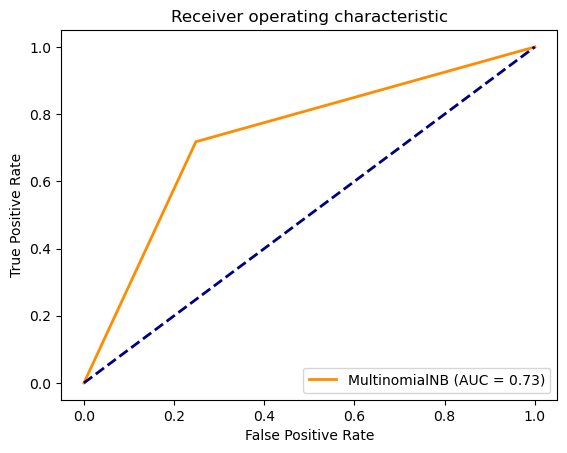


*** GaussianNB (Classification) ***
Accuracy score: 0.7558
Confusion matrix:
[[1164  375]
 [ 141  433]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1539
           1       0.54      0.75      0.63       574

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113



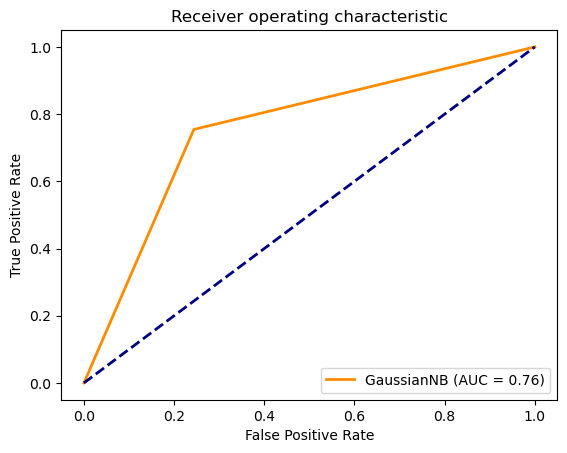

In [34]:
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import os 
from scipy import stats
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  precision_recall_curve
import numpy as n

# Khởi tạo biến lưu giá trị AUC hoặc R2 score cho từng mô hình
auc_scores = []
r2_scores = []
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])
# Huấn luyện và đánh giá mô hình
for model in [ada_c, gradient_c, xgbo_c, ada_r, gradient_r, xgbo_r, knn, lr, dtc, dtr] + nb_models:
    # Tách loại mô hình
    if model in [ada_c, gradient_c, xgbo_c, knn, dtc] + nb_models:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")
    
    # Huấn luyện mô hình trên tập train
    model.fit(X_train, y_train)
    
    # Đánh giá mô hình trên tập test
    if problem_type == "Classification": 
        y_pred = model.predict(X_test)
        print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification report:\n{classification_report(y_test, y_pred)}")

        
        # Tính AUC và lưu giá trị vào biến auc_scores
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()



        
    else: #Nếu là "Regression"
        y_pred = model.predict(X_test)
        print(f"R2 score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.4f}")
        print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: {:.4f}".format(rmse))

## 3) Sử dụng Feed Forward Neural Network và Reccurent Neural Network kết hợp với áp dụng các kỹ thuật tránh Overfiting¶

### Sử dụng lớp Dropout và EarlyStopping callback để tránh overfitting cho Feed Forward Neural Network

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN 
from tensorflow.keras.layers import Dropout

ffnn = Sequential()
ffnn.add(Dense(12, input_shape=(19,), activation='relu'))
Dropout(0.5) #Thêm lớp Dropout để ngẫu nhiên "tắt" một số nơ-ron trong quá trình huấn luyện.
ffnn.add(Dense(8, activation='relu'))
Dropout(0.5)
ffnn.add(Dense(1, activation='sigmoid'))
ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# Sử dụng EarlyStopping callback để dừng quá trình huấn luyện khi hiện tượng overfitting bắt đầu xuất hiện trên tập validation
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
ffnn.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
395/395 [==============================] - 2s 3ms/step - loss: 10.4754 - accuracy: 0.5753 - val_loss: 0.9769 - val_accuracy: 0.4909
Epoch 2/5
395/395 [==============================] - 1s 3ms/step - loss: 0.8759 - accuracy: 0.7056 - val_loss: 0.6253 - val_accuracy: 0.7637
Epoch 3/5
395/395 [==============================] - 1s 2ms/step - loss: 1.0266 - accuracy: 0.7140 - val_loss: 0.5171 - val_accuracy: 0.7799
Epoch 4/5
395/395 [==============================] - 1s 2ms/step - loss: 0.8304 - accuracy: 0.7302 - val_loss: 0.4603 - val_accuracy: 0.7870
Epoch 5/5
395/395 [==============================] - 1s 3ms/step - loss: 0.7505 - accuracy: 0.7388 - val_loss: 0.6229 - val_accuracy: 0.7688


In [37]:
history1 = ffnn.fit(X_test, y_test, epochs=5, validation_split=0.2, shuffle=True)

Epoch 1/5
53/53 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7852 - val_loss: 0.4668 - val_accuracy: 0.7683
Epoch 2/5
53/53 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7568 - val_loss: 0.6599 - val_accuracy: 0.7423
Epoch 3/5
53/53 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7828 - val_loss: 0.4639 - val_accuracy: 0.7636
Epoch 4/5
53/53 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7710 - val_loss: 0.7754 - val_accuracy: 0.7281
Epoch 5/5
53/53 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7763 - val_loss: 0.4861 - val_accuracy: 0.7707


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


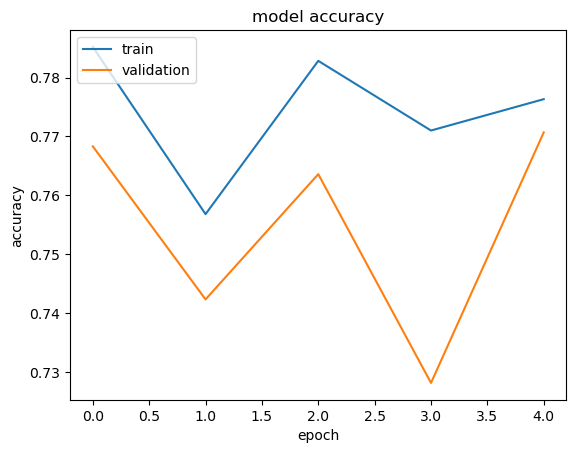

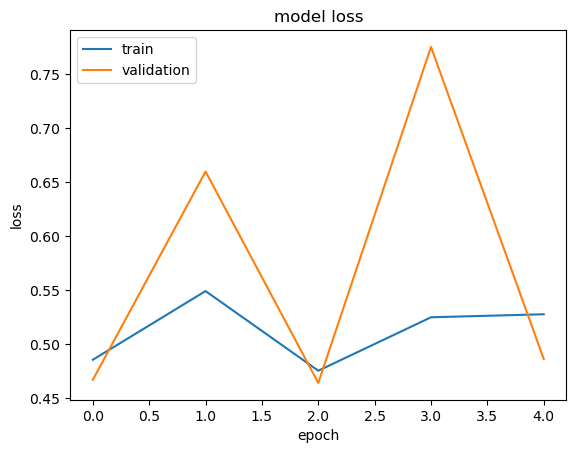

In [38]:
import keras
from matplotlib import pyplot as plt
print(history1.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
test_loss, test_acc = ffnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

67/67 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.7894
Test accuracy: 78.94%


### Sử dụng EarlyStopping callback để tránh overfitting cho Reccurent Neural Network

In [40]:
# Create the MLP model
# Initialising the RNN
rnn = Sequential()
rnn.add(SimpleRNN(units = 50, return_sequences = True, 
                        input_shape = (X_train.shape[1], 1)))

rnn.add(SimpleRNN(units = 50, return_sequences = False))
# Adding the output layer
rnn.add(Dense(units = 1))
# Compiling the RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [41]:
# Train the model

early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3)
rnn.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_split=0.2, callbacks=[early_stopping_rnn])

Epoch 1/5
62/62 [==============================] - 2s 12ms/step - loss: 0.1803 - accuracy: 0.7325 - val_loss: 0.1400 - val_accuracy: 0.7921
Epoch 2/5
62/62 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.7951 - val_loss: 0.1371 - val_accuracy: 0.8114
Epoch 3/5
62/62 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.7954 - val_loss: 0.1352 - val_accuracy: 0.8073
Epoch 4/5
62/62 [==============================] - 0s 8ms/step - loss: 0.1403 - accuracy: 0.7956 - val_loss: 0.1420 - val_accuracy: 0.8012
Epoch 5/5
62/62 [==============================] - 0s 6ms/step - loss: 0.1408 - accuracy: 0.7974 - val_loss: 0.1353 - val_accuracy: 0.8022


In [43]:
history2 = rnn.fit(X_test, y_test, epochs=5, validation_split=0.2, shuffle=True)

Epoch 1/5
53/53 [==============================] - 0s 8ms/step - loss: 0.1509 - accuracy: 0.7828 - val_loss: 0.1370 - val_accuracy: 0.7896
Epoch 2/5
53/53 [==============================] - 0s 7ms/step - loss: 0.1386 - accuracy: 0.7976 - val_loss: 0.1534 - val_accuracy: 0.7943
Epoch 3/5
53/53 [==============================] - 0s 7ms/step - loss: 0.1379 - accuracy: 0.8053 - val_loss: 0.1390 - val_accuracy: 0.7872
Epoch 4/5
53/53 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.7976 - val_loss: 0.1367 - val_accuracy: 0.7991
Epoch 5/5
53/53 [==============================] - 0s 7ms/step - loss: 0.1338 - accuracy: 0.8036 - val_loss: 0.1419 - val_accuracy: 0.8156


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


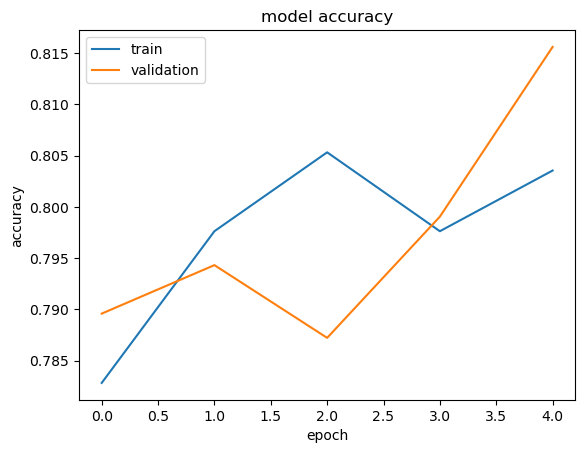

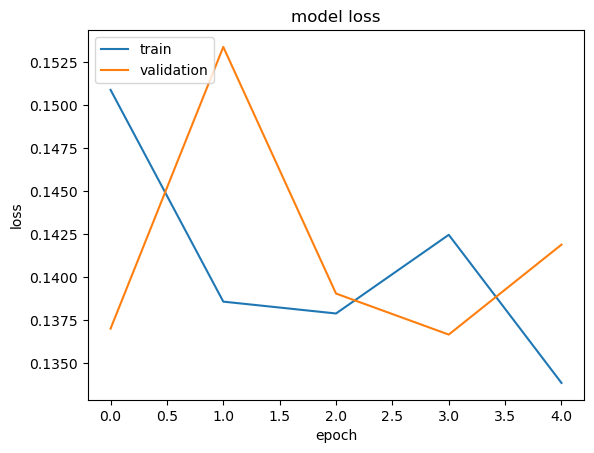

In [44]:
import keras
from matplotlib import pyplot as plt
print(history2.history.keys())
#  "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
test_loss, test_acc = rnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

67/67 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.8211
Test accuracy: 82.11%


## 5) Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.

### Ở trên là các mô hình đã được thông qua các phương pháp để cải thiện độ chính xác như: phân tích các trường hợp sai, Cross-Validation, Ensemble Learning, Regularization

### Dưới đây là kết quả của các mô hình khi chưa được áp dụng các phương pháp cải thiện

In [47]:
from sklearn.linear_model import LinearRegression
# Khởi tạo các mô hình
knn0 = KNeighborsClassifier(n_neighbors=5)
nb_models0 = [MultinomialNB(), GaussianNB()]
lr0 = LinearRegression()
dtc0 = DecisionTreeClassifier()
dtr0 = DecisionTreeRegressor()
ada_c0 = AdaBoostClassifier(n_estimators = 50)
ada_r0 = AdaBoostRegressor()
gradient_c0 = GradientBoostingClassifier(n_estimators = 50)
gradient_r0 = GradientBoostingRegressor()
xgbo_c0 = xgb.XGBClassifier(n_estimators = 50)
xgbo_r0 =xgb.XGBRegressor()


*** AdaBoostClassifier (Classification) ***
Accuracy score: 0.7965
Confusion matrix:
[[1384  155]
 [ 275  299]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.66      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



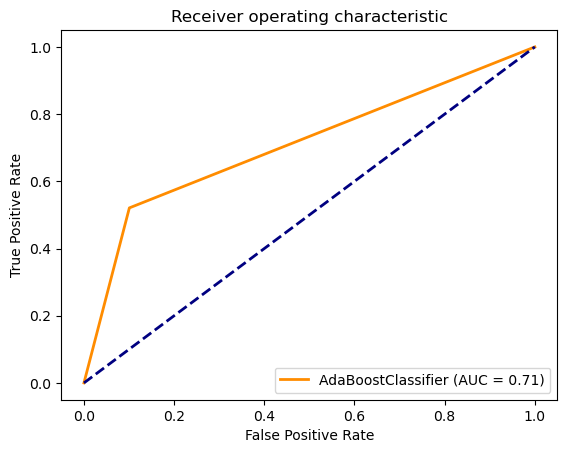


*** GradientBoostingClassifier (Classification) ***
Accuracy score: 0.8027
Confusion matrix:
[[1411  128]
 [ 289  285]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



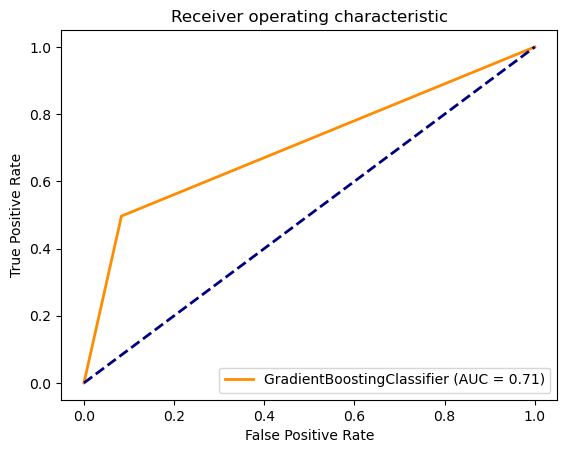


*** XGBClassifier (Classification) ***
Accuracy score: 0.7970
Confusion matrix:
[[1376  163]
 [ 266  308]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1539
           1       0.65      0.54      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



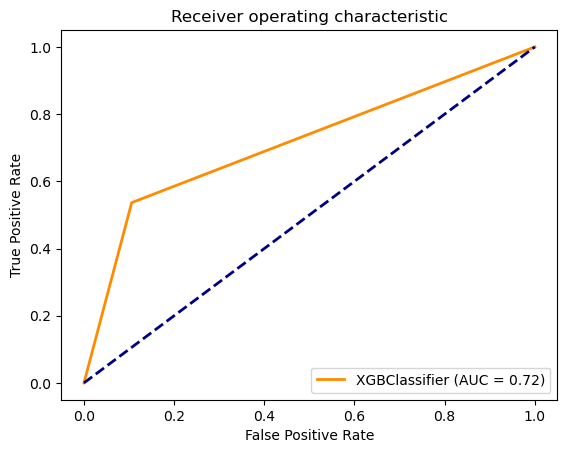


*** AdaBoostRegressor (Regression) ***
R2 score: 0.2572
Mean squared error: 0.1470
Mean absolute error: 0.3154
Root Mean squared error: 0.3834

*** GradientBoostingRegressor (Regression) ***
R2 score: 0.3339
Mean squared error: 0.1318
Mean absolute error: 0.2700
Root Mean squared error: 0.3630

*** XGBRegressor (Regression) ***
R2 score: 0.2063
Mean squared error: 0.1570
Mean absolute error: 0.2822
Root Mean squared error: 0.3963

*** KNeighborsClassifier (Classification) ***
Accuracy score: 0.7553
Confusion matrix:
[[1373  166]
 [ 351  223]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1539
           1       0.57      0.39      0.46       574

    accuracy                           0.76      2113
   macro avg       0.68      0.64      0.65      2113
weighted avg       0.74      0.76      0.74      2113



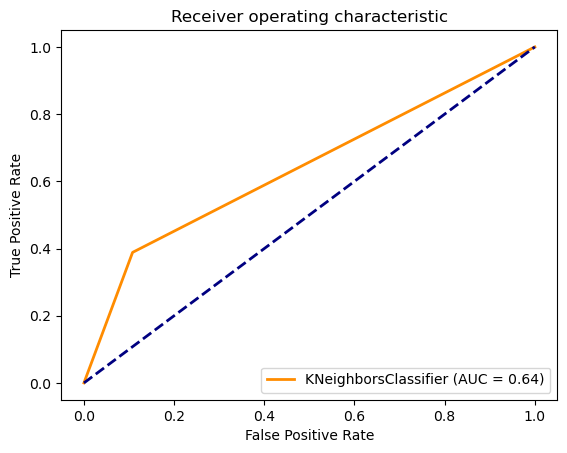


*** LinearRegression (Regression) ***
R2 score: 0.2897
Mean squared error: 0.1405
Mean absolute error: 0.3108
Root Mean squared error: 0.3749

*** DecisionTreeClassifier (Classification) ***
Accuracy score: 0.7288
Confusion matrix:
[[1246  293]
 [ 280  294]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1539
           1       0.50      0.51      0.51       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



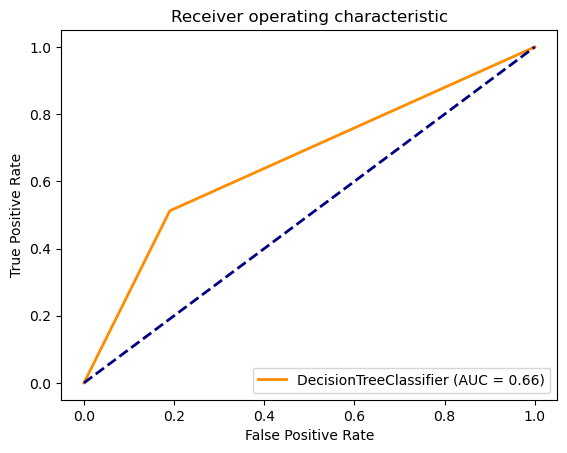


*** DecisionTreeRegressor (Regression) ***
R2 score: -0.3696
Mean squared error: 0.2710
Mean absolute error: 0.2718
Root Mean squared error: 0.5206

*** MultinomialNB (Classification) ***
Accuracy score: 0.7425
Confusion matrix:
[[1157  382]
 [ 162  412]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1539
           1       0.52      0.72      0.60       574

    accuracy                           0.74      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.74      0.75      2113



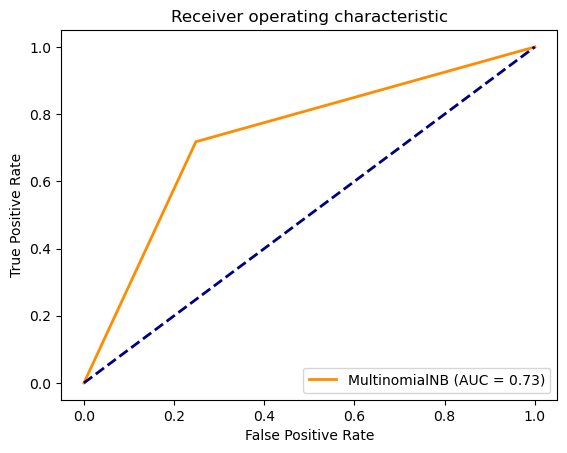


*** GaussianNB (Classification) ***
Accuracy score: 0.7558
Confusion matrix:
[[1164  375]
 [ 141  433]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1539
           1       0.54      0.75      0.63       574

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113



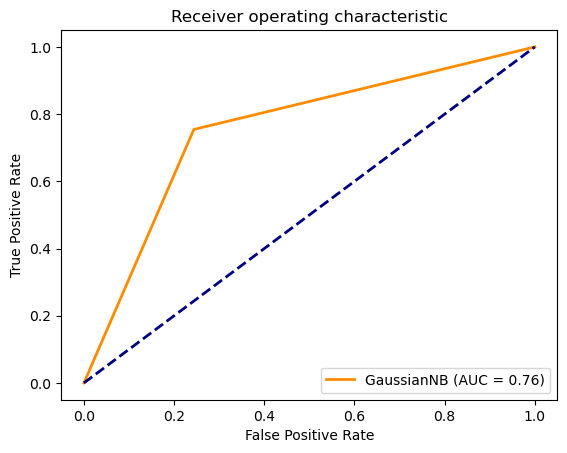

In [48]:
# Khởi tạo biến lưu giá trị AUC hoặc R2 score cho từng mô hình
auc_scores = []
r2_scores = []
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])
# Huấn luyện và đánh giá mô hình
for model in [ada_c0, gradient_c0, xgbo_c0, ada_r0, gradient_r0, xgbo_r0, knn0, lr0, dtc0, dtr0] + nb_models0:
    # Tách loại mô hình
    if model in [ada_c0, gradient_c0, xgbo_c0, knn0, dtc0] + nb_models0:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")
    
    # Huấn luyện mô hình trên tập train
    model.fit(X_train, y_train)
    
    # Đánh giá mô hình trên tập test
    if problem_type == "Classification": 
        y_pred = model.predict(X_test)
        print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification report:\n{classification_report(y_test, y_pred)}")

        
        # Tính AUC và lưu giá trị vào biến auc_scores
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()



        
    else: #Nếu là "Regression"
        y_pred = model.predict(X_test)
        print(f"R2 score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.4f}")
        print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: {:.4f}".format(rmse))